<a href="https://colab.research.google.com/github/CarvalCapstoneTeam/ML-Carval/blob/main/CarVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install keras

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/.config/gce
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2023.11.30/14.24.29.678035.log
/content/.config/logs/2023.11.30/14.21.35.326164.log
/content/.config/logs/2023.11.30/14.27.28.291696.log
/content/.config/logs/2023.11.30/14.24.39.396978.log
/content/.config/logs/2023.11.30/14.27.38.299831.log
/content/.config/logs/2023.11.30/14.27.39.135357.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline
from sklearn import preprocessing as рр
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, GridSearchCV
from keras.models import Sequential
from keras.layers import Embedding, GlobalMaxPool1D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import pickle

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake_job_postings.csv")
data

In [ ]:
print(data.shape)
print(data["fraudulent"].value_counts())

(17880, 18)
0    17014
1      866
Name: fraudulent, dtype: int64


In [ ]:
data = data.replace(np.nan, '', regex=True)
def standardize_text(df, text_field):
    df2 = df.copy(deep=True)
    df2[text_field] = df[text_field].str.replace(r"http\S+", "", regex=True)
    df2[text_field] = df[text_field].str.replace(r"http", "", regex=True)
    df2[text_field] = df[text_field].str.replace(r"@\S+", "", regex=True)
    df2[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", regex=True)
    df2[text_field] = df[text_field].str.replace(r"@", "at", regex=True)
    df2[text_field] = df[text_field].str.lower()
    return df2
df_clean = standardize_text(data, "description")

In [ ]:
df_clean['text'] = df_clean[['title', 'department','company_profile','description','requirements',
                     'benefits']].apply(lambda x: ' '.join(x), axis = 1)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
df_clean["tokens"] = df_clean["text"].apply(tokenizer.tokenize)
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
studentDfObj = df_clean["tokens"]
listOfDFRows = studentDfObj.to_numpy().tolist()
len(listOfDFRows)

17880

In [ ]:
from nltk.corpus import stopwords
lemm_tokens = []
lemms = []
for i in range(len(listOfDFRows)):
    for words in listOfDFRows[i]:
        if words not in stopwords.words('english'):
            lemmas = lemmatizer.lemmatize(words.lower(), pos='v')
            lemms.append(lemmas)
    lemm_tokens.append(lemms)
    lemms = []
a = lemm_tokens
%store a

Stored 'a' (list)


In [ ]:
%store -r a
len(a)

17880

In [ ]:
df_clean = df_clean.assign(lemm_tokens=a)

In [ ]:
y = df_clean['fraudulent']
X = df_clean['lemm_tokens']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Balanced vs. Unbalanced data

Use TFIdfVectorizer on dataframe

In [ ]:
def dummy_fun(doc):
    return doc
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(14304, 87972)
(3576, 87972)


NearMiss for Balancing Data

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train_tfidf, y_train.ravel())
X_test_miss, y_test_miss = nr.fit_resample(X_test_tfidf, y_test.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 678
Before Undersampling, counts of label '0': 13626 

After Undersampling, the shape of train_X: (1356, 87972)
After Undersampling, the shape of train_y: (1356,) 

After Undersampling, counts of label '1': 678
After Undersampling, counts of label '0': 678


In [ ]:
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", random_state=100, max_iter=1000)
sgd_clf.fit(X_train_miss, y_train_miss)
y_predicted_sgd_clf = sgd_clf.predict(X_test_miss)
print(classification_report(y_test_miss, y_predicted_sgd_clf))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       188
           1       0.92      0.91      0.92       188

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.92      0.92      0.92       376



In [ ]:
print("ROC-AUC:", roc_auc_score(y_predicted_sgd_clf,y_test_miss))
print("Accuracy:", accuracy_score(y_predicted_sgd_clf,y_test_miss))

ROC-AUC: 0.9175650058003
Accuracy: 0.9175531914893617


In [ ]:
clf_log = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', random_state=40)
clf_log.fit(X_train_miss, y_train_miss)
y_predicted_log = clf_log.predict(X_test_miss)

print(classification_report(y_test_miss, y_predicted_log))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       188
           1       0.92      0.91      0.92       188

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.92      0.92      0.92       376



In [ ]:
print("ROC-AUC:", roc_auc_score(y_predicted_log,y_test_miss))
print("Accuracy:", accuracy_score(y_predicted_log,y_test_miss))

ROC-AUC: 0.917659544361115
Accuracy: 0.9175531914893617


Use Word Embeddings on dataframe

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=14727)
tokenizer.fit_on_texts(X)
train_wordemb = tokenizer.texts_to_sequences(X_train)
test_wordemb = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

train_wordemb = pad_sequences(train_wordemb, padding='post', maxlen=maxlen)
test_wordemb = pad_sequences(test_wordemb, padding='post', maxlen=maxlen)

In [ ]:
X_train_miss2, y_train_miss2 = nr.fit_resample(train_wordemb, y_train.ravel())
X_test_miss2, y_test_miss2 = nr.fit_resample(test_wordemb, y_test.ravel())

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size,
                           output_dim=embedding_dim,
                           input_length=100))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           4967700   
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 10)                50010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5017721 (19.14 MB)
Trainable params: 5017721 (19.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9096


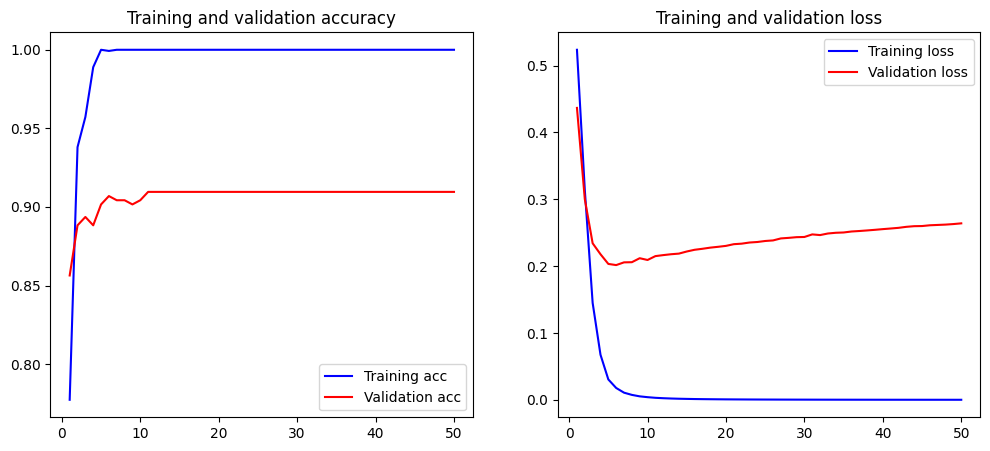

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

history = model.fit(X_train_miss2, y_train_miss2, epochs=50, verbose=False,
                    validation_data=(X_test_miss2, y_test_miss2), batch_size=50)
loss, accuracy = model.evaluate(X_train_miss2, y_train_miss2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_miss2, y_test_miss2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           4967700   
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4968221 (18.95 MB)
Trainable params: 4968221 (18.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training Accuracy: 0.9948
Testing Accuracy:  0.9229


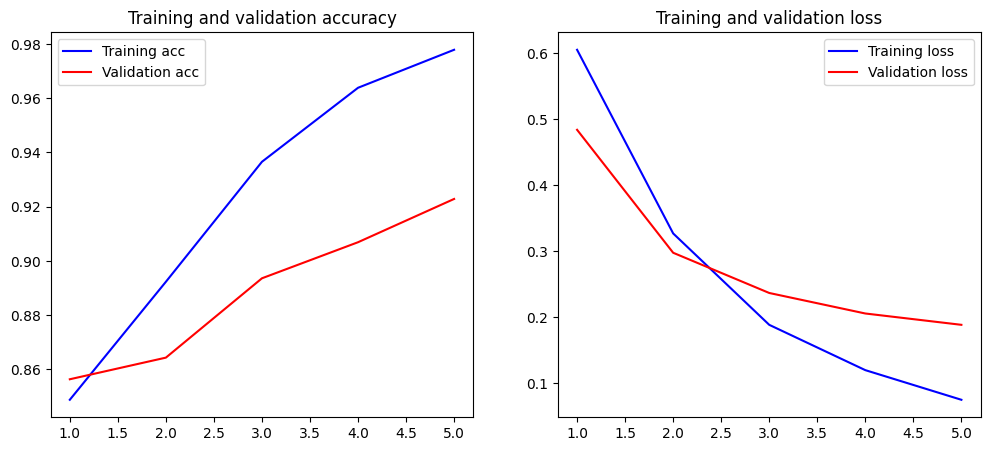

In [ ]:
history1 = model1.fit(X_train_miss2, y_train_miss2, epochs=5, verbose=False,
                    validation_data=(X_test_miss2, y_test_miss2), batch_size=10)
loss, accuracy = model1.evaluate(X_train_miss2, y_train_miss2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test_miss2, y_test_miss2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history1)

Found, that the method TFIdfVectorizer gives better results than Tokenizer

# use a TFIdfVectorizer method with unbalanced data

In [ ]:
sgd_clf2 = SGDClassifier(loss="hinge", penalty="l2", random_state=100, max_iter=1000)
sgd_clf2.fit(X_train_tfidf, y_train)
y_predicted_sgd_clf2 = sgd_clf2.predict(X_test_tfidf)
print(classification_report(y_test, y_predicted_sgd_clf2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3388
           1       1.00      0.57      0.73       188

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.97      3576



In [ ]:
print("ROC-AUC:", roc_auc_score(y_predicted_sgd_clf2,y_test))
print("Accuracy:", accuracy_score(y_predicted_sgd_clf2,y_test))

ROC-AUC: 0.9884659746251442
Accuracy: 0.9776286353467561


In [ ]:
clf_log2 = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', random_state=40)
clf_log2.fit(X_train_tfidf, y_train)
y_predicted_log2 = clf_log2.predict(X_test_tfidf)

print(classification_report(y_test, y_predicted_log2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3388
           1       0.92      0.78      0.85       188

    accuracy                           0.99      3576
   macro avg       0.96      0.89      0.92      3576
weighted avg       0.98      0.99      0.98      3576



In [ ]:
print("ROC-AUC:", roc_auc_score(y_predicted_log2,y_test))
print("Accuracy:", accuracy_score(y_predicted_log2,y_test))

ROC-AUC: 0.9562647362521465
Accuracy: 0.985178970917226


The greatest accuracy and ROC-AUC metrics was in the model SGDClassifier (98% ROC-AUC, 98% accuracy)

In [ ]:
with open('model.pickle', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('model.pickle', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
# predictions = loaded_model.predict(X_test_miss2)

# # Tampilkan hasil prediksi
# for i in range(len(predictions)):
#     print(f"Prediksi untuk contoh {i + 1}: {predictions[i, 0]}")  # Output probabilitas dengan aktivasi sigmoid
#     if predictions[i, 0] >= 0.5:
#         print("Prediksi: Pekerjaan Asli")
#     else:
#         print("Prediksi: Pekerjaan Bukan Asli")
#     print("\n")
#
#-----------------------------------------------------------------------------------------------------------------------------------------------------
user_input = input("Masukkan pekerjaan yang ingin diprediksi: ")

user_input_sequences = tokenizer.texts_to_sequences([user_input])
user_input_padded = pad_sequences(user_input_sequences, padding='post', maxlen=maxlen)

prediction = loaded_model.predict(user_input_padded)

# Tampilkan hasil prediksi
print(f"Probabilitas Pekerjaan Asli: {prediction[0, 0]}")  # Output probabilitas dengan aktivasi sigmoid

if prediction[0, 0] >= 0.05:
    print("Prediksi: Pekerjaan Palsu")
else:
    print("Prediksi: Pekerjaan Asli")

KeyboardInterrupt: ignored